In [3]:
import os
import glob
import pandas as pd
from pandas import Series,DataFrame

In [4]:
# files = file for file in os.listdir[('.relative path')]
# this gets each file from the listed files from os.listdir('./Sales_Data')

files = [file for file in os.listdir('./Sales_Data')]

# Make an empty dataframe where you will place data later on
all_months_data = pd.DataFrame()

# get file until it can't do so
for file in files:
    df = pd.read_csv("./Sales_Data/" + file, encoding='ISO-8859-1')
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index = False)
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN


In [5]:
# Clean up data
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')

# Find 'Or' and delete it

#all_data = all_data[all_data["Order Date"].str[0:2] == 'Or'] this filters the value causing an error.
# To get rid of the value, just remove 'Or' using ! (negate)! Super Simple!
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']


In [6]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN


In [7]:
# delete a column, df.drop(df.columns[column number],axis = 1)
all_data = all_data.drop(all_data.columns[6], axis = 1)

In [8]:
# Task 2 Add month column

# df['new name'] = 'what's inside' super easy!
# bscially, grabbing 'Order Date' and its string 0 to 2.

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


In [9]:
# converting columns to numeric, not string
all_data.columns[2]

'Quantity Ordered'

In [10]:
print(all_data.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')


In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [12]:
# Task 3 - adding a column based on price and quantity ordered

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [13]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered
Month,
01,10903
02,13449
03,17005
04,20558
05,18667
06,15253
07,16072
08,13448
09,13109


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# What city had the highest number of sales?

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2] if (',' in x) and (len(x.split(',')) >= 2) else 'Default Value')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY 10001
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA 30301
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.99,MA 02215
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.99,NY 10001
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.95,CA 94016
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.95,CA 94016


In [16]:
results_city = all_data.groupby('City').sum('Sales')
results_city

,Quantity Ordered
City,
CA 90001,33289
CA 94016,50239
GA 30301,16602
MA 02215,22528
ME 04101,2750
NY 10001,27932
OR 97035,11303
TX 73301,11153
TX 75001,16730


Text(0.5, 0, 'State & Zip Code')

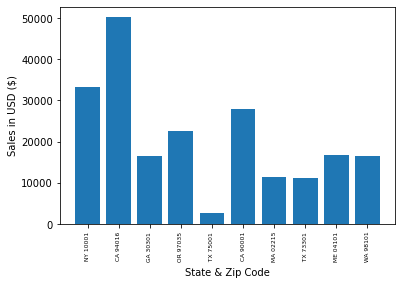

In [17]:
cities = all_data['City'].unique()

plt.bar(cities,results_city['Quantity Ordered'])

plt.xticks(cities,rotation = 'vertical',size = 6)
plt.ylabel('Sales in USD ($)')
plt.xlabel('State & Zip Code')

Text(0.5, 1.0, 'Monthy Sales')

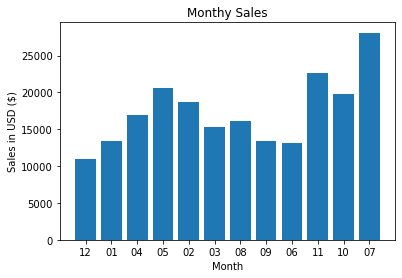

In [20]:
months = all_data['Month'].unique()

plt.bar(months,results['Quantity Ordered'])
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Monthy Sales')

In [21]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY 10001
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA 30301
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.99,MA 02215
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.99,NY 10001
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.95,CA 94016
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.95,CA 94016


In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [42]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700,NY 10001,0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA 30301,12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",06,2.99,MA 02215,19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",06,149.99,NY 10001,19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",06,11.95,CA 94016,18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",06,11.95,CA 94016,18,35


In [53]:
hours = [hour for hour, df in all_data.groupby('Hour')]

In [63]:
all_data_new = all_data.groupby(['Hour']).count()

In [76]:
plt.plot(all_data_new['Hour'],all_data_new.columns[3])

KeyError: 'Hour'

In [67]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
